In [1]:
#Importing Required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing datasets
df=pd.read_csv('E:\PGD DATA SCIENCE\Logistic Regression\Lead+Scoring+Case+Study\Lead Scoring Assignment\Leads.csv')

In [3]:
#Checking the data
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
df.shape#Checking the number of columns and rows

(9240, 37)

In [5]:
df.info()#Checking the datatypes of the columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [6]:
#Checking the numerical columns in the dataframe
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [7]:
#Checking the null values in the dataframe
df.isnull().sum().sort_values(ascending = False)

Lead Quality                                     4767
Asymmetrique Profile Score                       4218
Asymmetrique Activity Score                      4218
Asymmetrique Profile Index                       4218
Asymmetrique Activity Index                      4218
Tags                                             3353
What matters most to you in choosing a course    2709
Lead Profile                                     2709
What is your current occupation                  2690
Country                                          2461
How did you hear about X Education               2207
Specialization                                   1438
City                                             1420
TotalVisits                                       137
Page Views Per Visit                              137
Last Activity                                     103
Lead Source                                        36
Do Not Email                                        0
Do Not Call                 

In [8]:
#Dropping the columns where null values count is greater than 3000
for c in df.columns:
    if df[c].isnull().sum() > 3000:
        df.drop(c,1,inplace = True)

In [9]:
#Checking the columns info after dropping
df.shape

(9240, 31)

In [10]:
#Checking the null values after dropping the null values 
df.isnull().sum().sort_values(ascending = False)

What matters most to you in choosing a course    2709
Lead Profile                                     2709
What is your current occupation                  2690
Country                                          2461
How did you hear about X Education               2207
Specialization                                   1438
City                                             1420
TotalVisits                                       137
Page Views Per Visit                              137
Last Activity                                     103
Lead Source                                        36
Lead Number                                         0
Lead Origin                                         0
Do Not Email                                        0
Converted                                           0
Total Time Spent on Website                         0
Do Not Call                                         0
Last Notable Activity                               0
A free copy of Mastering The

In [11]:
#Because the learning platform is Online type the City and Country woun't bring any changes to model.Hence we are dropping the these columns 
df.drop(['City','Country'],1,inplace = True)

In [12]:
df.isnull().sum().sort_values(ascending = False) #Checking the null values after dropping the City and Country columns

What matters most to you in choosing a course    2709
Lead Profile                                     2709
What is your current occupation                  2690
How did you hear about X Education               2207
Specialization                                   1438
TotalVisits                                       137
Page Views Per Visit                              137
Last Activity                                     103
Lead Source                                        36
Lead Number                                         0
Lead Origin                                         0
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
Total Time Spent on Website                         0
Last Notable Activity                               0
A free copy of Mastering The Interview              0
Search                                              0
Magazine                    

In [13]:
#There are few columns in which there is level called 'Select' means the student did not selected any particular option for that column.

In [14]:
#Lets identify the columns with 'select' values in the column.
for c in df.columns:
    print(df[c].astype('category').value_counts())
    print('\n\n\n############################\n\n\n')

fffb0e5e-9f92-4017-9f42-781a69da4154    1
56453aec-3f7b-4f30-870c-8f966d393100    1
53ac14bd-2bb2-4315-a21c-94562d1b6b2d    1
53aabd84-5dcc-4299-bbe3-62f3764b07b1    1
539ffa32-1be7-4fe1-b04c-faf1bab763cf    1
                                       ..
aa4180a5-84f1-4e67-8d90-0c8403070a59    1
aa405742-17ac-4c65-b19e-ab91c241cc53    1
aa30ebb2-8476-41ce-9258-37cc025110d3    1
aa27a0af-eeab-4007-a770-fa8a93fa53c8    1
000104b9-23e4-4ddc-8caa-8629fe8ad7f4    1
Name: Prospect ID, Length: 9240, dtype: int64



############################



660737    1
603303    1
602561    1
602557    1
602540    1
         ..
630422    1
630405    1
630403    1
630390    1
579533    1
Name: Lead Number, Length: 9240, dtype: int64



############################



Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64



############################



Google           

So after checking the value counts of the columns lets drop the columns whose 'select' value contains more than 50% of total value and columns with out any variance

 do not call, how did you hear about X education, What matters most to you in choosing a course,search,Magazine,Newspaper Article,X education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,I agree to pay the amount through cheque,  

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 29 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [16]:
#As per the observation above these are the columns selected to drop from the dataframe.
#We are storing the all the columns in l.
l = ['Do Not Call','How did you hear about X Education','What matters most to you in choosing a course','Search','Magazine','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content','Lead Profile','I agree to pay the amount through cheque']

In [17]:
df.drop(l,1,inplace = True)

In [18]:
df.shape#Checking the dataframe columns and rows after dropping the unnecessary columns

(9240, 14)

In [19]:
df.isnull().sum().sort_values(ascending = False)#Checking the null values

What is your current occupation           2690
Specialization                            1438
Page Views Per Visit                       137
TotalVisits                                137
Last Activity                              103
Lead Source                                 36
Last Notable Activity                        0
A free copy of Mastering The Interview       0
Total Time Spent on Website                  0
Converted                                    0
Do Not Email                                 0
Lead Origin                                  0
Lead Number                                  0
Prospect ID                                  0
dtype: int64

In [20]:

#Lets remove the null values from the above columns,as they are important columns for model 
df = df[~pd.isnull(df['What is your current occupation'])] 

In [21]:
#Checking after removing null values  
df['What is your current occupation'].isna().sum()

0

In [22]:
df.shape#Checking table structure after removing nulls

(6550, 14)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6550 entries, 0 to 9239
Data columns (total 14 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Prospect ID                             6550 non-null   object 
 1   Lead Number                             6550 non-null   int64  
 2   Lead Origin                             6550 non-null   object 
 3   Lead Source                             6514 non-null   object 
 4   Do Not Email                            6550 non-null   object 
 5   Converted                               6550 non-null   int64  
 6   TotalVisits                             6420 non-null   float64
 7   Total Time Spent on Website             6550 non-null   int64  
 8   Page Views Per Visit                    6420 non-null   float64
 9   Last Activity                           6447 non-null   object 
 10  Specialization                          6532 non-null   obje

In [24]:
df.isnull().sum().sort_values(ascending = False)

Page Views Per Visit                      130
TotalVisits                               130
Last Activity                             103
Lead Source                                36
Specialization                             18
Last Notable Activity                       0
A free copy of Mastering The Interview      0
What is your current occupation             0
Total Time Spent on Website                 0
Converted                                   0
Do Not Email                                0
Lead Origin                                 0
Lead Number                                 0
Prospect ID                                 0
dtype: int64

In [25]:
df = df[~pd.isnull(df['TotalVisits'])] 

In [26]:
df.isnull().sum().sort_values(ascending = False)

Lead Source                               29
Specialization                            18
Last Notable Activity                      0
A free copy of Mastering The Interview     0
What is your current occupation            0
Last Activity                              0
Page Views Per Visit                       0
Total Time Spent on Website                0
TotalVisits                                0
Converted                                  0
Do Not Email                               0
Lead Origin                                0
Lead Number                                0
Prospect ID                                0
dtype: int64

In [27]:
df = df[~pd.isnull(df['Lead Source'])]

In [28]:
df.isnull().sum().sort_values(ascending = False)

Specialization                            18
Last Notable Activity                      0
A free copy of Mastering The Interview     0
What is your current occupation            0
Last Activity                              0
Page Views Per Visit                       0
Total Time Spent on Website                0
TotalVisits                                0
Converted                                  0
Do Not Email                               0
Lead Source                                0
Lead Origin                                0
Lead Number                                0
Prospect ID                                0
dtype: int64

In [29]:
df = df[~pd.isnull(df['Specialization'])]

In [30]:
df.isnull().sum().sort_values(ascending = False)

Last Notable Activity                     0
A free copy of Mastering The Interview    0
What is your current occupation           0
Specialization                            0
Last Activity                             0
Page Views Per Visit                      0
Total Time Spent on Website               0
TotalVisits                               0
Converted                                 0
Do Not Email                              0
Lead Source                               0
Lead Origin                               0
Lead Number                               0
Prospect ID                               0
dtype: int64

In [31]:
#As observed in the data Prospect Id and Lead Number columns are unique values and its acts like an index column,hence it wont plays vital role in model building hence we can drop the column
df.drop(['Prospect ID','Lead Number'],1,inplace= True)

In [32]:
df.info() #Checking the columns after dropping above columns

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6373 entries, 0 to 9239
Data columns (total 12 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             6373 non-null   object 
 1   Lead Source                             6373 non-null   object 
 2   Do Not Email                            6373 non-null   object 
 3   Converted                               6373 non-null   int64  
 4   TotalVisits                             6373 non-null   float64
 5   Total Time Spent on Website             6373 non-null   int64  
 6   Page Views Per Visit                    6373 non-null   float64
 7   Last Activity                           6373 non-null   object 
 8   Specialization                          6373 non-null   object 
 9   What is your current occupation         6373 non-null   object 
 10  A free copy of Mastering The Interview  6373 non-null   obje

In [33]:
df1 = df #Creating the copy of dataframe for further use.

Categorical coulmns = Lead Origin,Lead Soure,Do Not Email,Last Activity,Specialization,What is your current occupation,A free copy of Mastering the Interview,Late Notable Activity

In [34]:
#Storing the categorical columns in the D_col var
D_col = ['Lead Origin','Lead Source','Do Not Email','Last Activity','What is your current occupation','A free copy of Mastering The Interview','Last Notable Activity']

Lets perform onehot encoding for categorical columns

In [35]:
#Creating dummy variables for all categorical columns
#As we know that for k level dummies there should be k-1 level. So,we are dropping redundant dummy variable.

In [36]:
df = pd.get_dummies(df,columns = D_col,drop_first = True)

In [37]:
df.info()#Checking the table structure after onehot encoding.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6373 entries, 0 to 9239
Data columns (total 58 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Converted                                             6373 non-null   int64  
 1   TotalVisits                                           6373 non-null   float64
 2   Total Time Spent on Website                           6373 non-null   int64  
 3   Page Views Per Visit                                  6373 non-null   float64
 4   Specialization                                        6373 non-null   object 
 5   Lead Origin_Landing Page Submission                   6373 non-null   uint8  
 6   Lead Origin_Lead Add Form                             6373 non-null   uint8  
 7   Lead Origin_Lead Import                               6373 non-null   uint8  
 8   Lead Source_Direct Traffic                            6373

In [38]:
#Checking the data after onehot encoding
df.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Specialization,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,...,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0.0,0,0.0,Select,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,5.0,674,2.5,Select,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,1,2.0,1532,2.0,Business Administration,1,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,Media and Advertising,1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
4,1,2.0,1428,1.0,Select,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [39]:
#We are handling the specialization column separtely for onehot encoding because we need to be specificly remove the 'select' data from the column
temp = pd.get_dummies(df['Specialization'],prefix = 'Specialization')
temp = temp.drop(['Specialization_Select'],1)

In [40]:
#Lets add the newly created 'Specialization' dummies with original dataframe and remove the categorial column Specialization from original df
df = pd.concat([df,temp],1)

In [41]:
#Now drop the 'Specialization' columns from dataframe as we alredy created dummies for the same
df.drop('Specialization',1,inplace = True)

In [42]:
df.head() #Checking the data after dropping

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,...,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
0,0,0.0,0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,2.0,1532,2.0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
4,1,2.0,1428,1.0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


# Building the Model

In [43]:
X = df.drop('Converted',1) #Putting feature variable to x 
X.head()#Checking the data

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,...,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
0,0.0,0,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5.0,674,2.5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2.0,1532,2.0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.0,305,1.0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,2.0,1428,1.0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [44]:
y = df['Converted'] #Putting response variable stored in y

In [45]:
X.shape #Checking the structure of X variable

(6373, 74)

In [46]:
y.shape #Checking the structure of y variable

(6373,)

In [47]:
y.head() #Checking the data

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

### Train_Test_Split

In [48]:
#Importing required libraries to perform Train_Test_Split
import sklearn
from sklearn.model_selection import train_test_split

In [49]:
#Splitting the data in to train and test
X_train, X_test, y_train, y_test = train_test_split(X, y,train_size = 0.70 ,test_size=0.30, random_state=42)

## Feature Scaling

In [50]:
#importing the required libraries for scaling
from sklearn.preprocessing import MinMaxScaler

In [51]:
scaler = MinMaxScaler()

In [52]:
#Checking the column info beforing scaling
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6373 entries, 0 to 9239
Data columns (total 75 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Converted                                             6373 non-null   int64  
 1   TotalVisits                                           6373 non-null   float64
 2   Total Time Spent on Website                           6373 non-null   int64  
 3   Page Views Per Visit                                  6373 non-null   float64
 4   Lead Origin_Landing Page Submission                   6373 non-null   uint8  
 5   Lead Origin_Lead Add Form                             6373 non-null   uint8  
 6   Lead Origin_Lead Import                               6373 non-null   uint8  
 7   Lead Source_Direct Traffic                            6373 non-null   uint8  
 8   Lead Source_Facebook                                  6373

In [53]:
#Lets first fit the transform on train set
scale = ['TotalVisits','Total Time Spent on Website','Page Views Per Visit']
X_train[scale] = scaler.fit_transform(X_train[scale])

In [54]:
X_train.head()#Checking the data after scaling


,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,...,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
7656,0.052174,0.154930,0.375000,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8843,0.026087,0.752201,0.187500,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8720,0.113043,0.091109,0.203125,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4979,0.034783,0.378961,0.250000,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1400,0.017391,0.705546,0.125000,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [55]:
X_train.describe()# We can see max values of all the columns is equal to 1 after minmax scaling

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,...,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
count,4461.000000,4461.000000,4461.000000,4461.000000,4461.000000,4461.000000,4461.000000,4461.000000,4461.000000,4461.000000,...,4461.000000,4461.000000,4461.000000,4461.000000,4461.000000,4461.000000,4461.000000,4461.000000,4461.000000,4461.000000
mean,0.031075,0.236167,0.154259,0.566465,0.089442,0.003587,0.290069,0.003811,0.324815,0.000224,...,0.043040,0.021072,0.104685,0.024434,0.061197,0.013226,0.008967,0.003587,0.043264,0.022865
std,0.033837,0.249367,0.128277,0.495618,0.285412,0.059788,0.453845,0.061621,0.468358,0.014972,...,0.202969,0.143639,0.306181,0.154410,0.239718,0.114253,0.094277,0.059788,0.203473,0.149489
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.008696,0.015845,0.062500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.026087,0.123680,0.125000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.043478,0.453345,0.218750,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [56]:
#Checking the converted rate:
cnvrtd=(sum(df['Converted'])/len(df['Converted'].index))*100
cnvrtd

48.093519535540565

We have almost 48% conversion rate

###  Feature Elimination using RFE

In [57]:
#Importing required libraries
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [58]:
from sklearn.feature_selection import RFE
rfe =  RFE(logreg, 15)
rfe = rfe.fit(X_train,y_train)

In [59]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))#Checking the columns 

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 9),
 ('Lead Origin_Landing Page Submission', False, 12),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 53),
 ('Lead Source_Direct Traffic', False, 31),
 ('Lead Source_Facebook', False, 45),
 ('Lead Source_Google', False, 34),
 ('Lead Source_Live Chat', False, 50),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 32),
 ('Lead Source_Pay per Click Ads', False, 46),
 ('Lead Source_Press_Release', False, 57),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 33),
 ('Lead Source_Social Media', False, 6),
 ('Lead Source_WeLearn', False, 60),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 56),
 ('Lead Source_testone', False, 44),
 ('Do Not Email_Yes', True, 1),
 ('Last Activity_Converted to Lead', True, 1),
 ('Last Activity_Email Bounced', False, 4),
 ('Last Activity_Email Link Clic

In [60]:
#Storing the valid RFE values in to col variable
col = X_train.columns[rfe.support_]


In [61]:
col

Index(['TotalVisits', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Lead Source_Reference', 'Lead Source_Welingak Website',
       'Do Not Email_Yes', 'Last Activity_Converted to Lead',
       'Last Activity_Olark Chat Conversation', 'Last Activity_SMS Sent',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Unreachable'],
      dtype='object')

In [62]:
corr_col = ['Converted','TotalVisits', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Lead Source_Reference', 'Lead Source_Welingak Website',
       'Do Not Email_Yes', 'Last Activity_Converted to Lead',
       'Last Activity_Olark Chat Conversation', 'Last Activity_SMS Sent',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Unreachable']

In [63]:
# making a new dataframe to get the correlation between the columns with the converted column
df2 = df[corr_col]

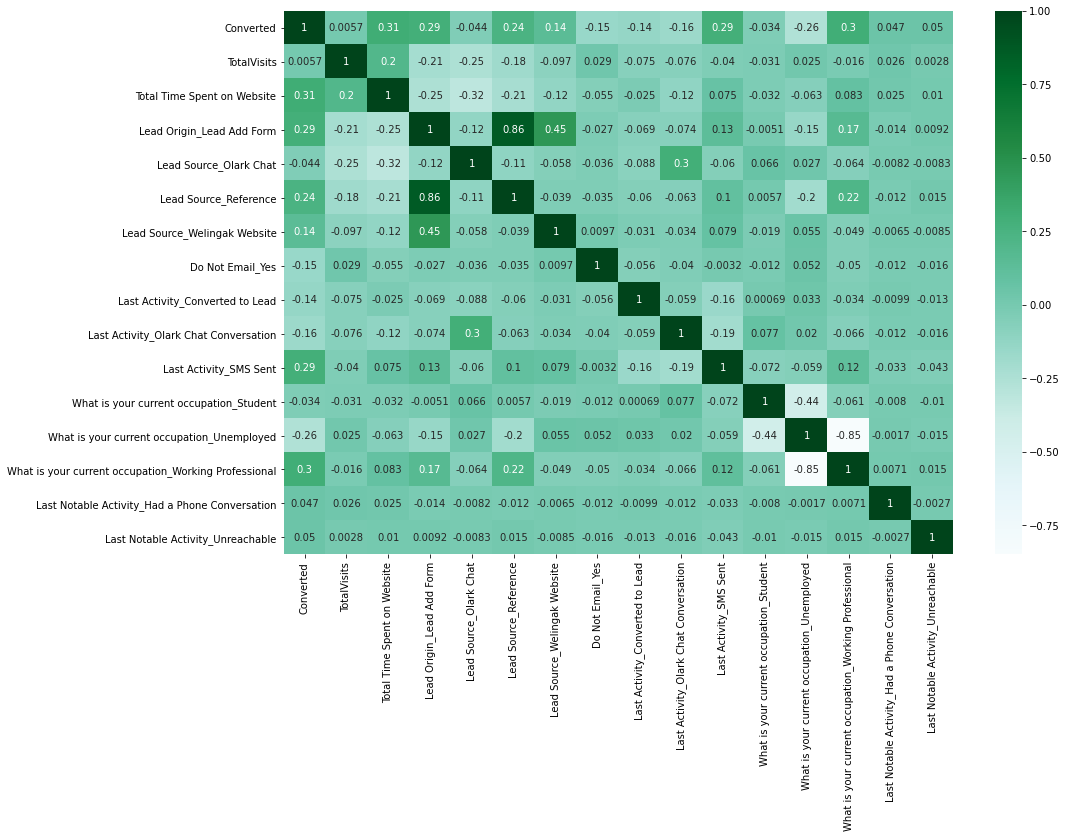

In [64]:
# Correlation matrix between the final variables
plt.figure(figsize = (15,10))
sns.heatmap(df2.corr(), annot = True,cmap="BuGn")
plt.show()

From the heat map we have positive correlation between the following columns 

1)'Lead_source_reference' and 'Lead Origin_Lead Add Form' 

2)'Last Activity_Email Bounced' and 'Do Not Email_Yes' 

3)'Last Notable Activity_Email Bounced' and 'Last Activity_Email Bounced'

Lets further perform the pvalue and VIF checks to remove the highly correlated columns.

In [65]:
X_train = X_train[col]#Updating the X_train values with final RFE values

In [66]:
#Importing required libraries
import statsmodels.api as sm

In [67]:
X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4445
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2051.7
Date:                Wed, 08 Sep 2021   Deviance:                       4103.5
Time:                        20:13:32   Pearson chi2:                 4.48e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.6512      0.585     -1.113      0.266      -1.798       0.496
TotalVisits                                              3.8718      1.193      3.245      0.001       1.533       6.211
Total Time Spent on Website                              4.3393      0.185     23.453      0.000       3.977       4.702
Lead Origin_Lead Add Form                                0.8709      1.080      0.806      0.420      -1.246       2.988
Lead Source_Olark Chat                                   1.5706      0.126     12.469      0.000       1.324       1.817
Lead Source_Reference                                    2.7508      1.103      2.494      0.013       0.589       4.913
Lead Source_Welingak Website                             4.7487      1.300      3.652      0.000       2.200       7.297
Do Not Email_Yes                                        -1.5511      0.193     -8.029      0.000      -1.930      -1.172
Last Activity_Converted to Lead                         -1.1281      0.238     -4.739      0.000      -1.595      -0.662
Last Activity_Olark Chat Conversation                   -1.3137      0.185     -7.118      0.000      -1.675      -0.952
Last Activity_SMS Sent                                   1.0819      0.084     12.873      0.000       0.917       1.247
What is your current occupation_Student                 -1.4023      0.618     -2.269      0.023      -2.614      -0.191
What is your current occupation_Unemployed              -1.4998      0.582     -2.578      0.010      -2.640      -0.359
What is your current occupation_Working Professional     1.2930      0.614      2.107      0.035       0.090       2.496
Last Notable Activity_Had a Phone Conversation          22.9012   1.23e+04      0.002      0.999   -2.41e+04    2.42e+04
Last Notable Activity_Unreachable                        2.5880      0.815      3.176      0.001       0.991       4.185
========================================================================================================================
"""

In [68]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Origin_Lead Add Form,80.01
4,Lead Source_Reference,61.25
5,Lead Source_Welingak Website,20.12
11,What is your current occupation_Unemployed,4.81
1,Total Time Spent on Website,2.40
0,TotalVisits,2.37
9,Last Activity_SMS Sent,1.71
12,What is your current occupation_Working Profes...,1.69
3,Lead Source_Olark Chat,1.64
8,Last Activity_Olark Chat Conversation,1.24


In [69]:
#As both pvalue and VIF are high for Lead Source_Reference we are dropping it.
X_train.drop('Lead Source_Reference',axis =1 , inplace = True)

In [70]:
#Generating the model again after removing the 'Lead Source_Reference'column 
X_train_sm2 = sm.add_constant(X_train)
logm3 = sm.GLM(y_train,X_train_sm2, family = sm.families.Binomial())
res2 = logm3.fit()
res2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4446
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2054.4
Date:                Wed, 08 Sep 2021   Deviance:                       4108.7
Time:                        20:13:32   Pearson chi2:                 4.46e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.6436      0.585     -1.101      0.271      -1.790       0.503
TotalVisits                                              3.8171      1.192      3.202      0.001       1.480       6.154
Total Time Spent on Website                              4.3322      0.185     23.420      0.000       3.970       4.695
Lead Origin_Lead Add Form                                3.5401      0.227     15.574      0.000       3.095       3.986
Lead Source_Olark Chat                                   1.5619      0.126     12.397      0.000       1.315       1.809
Lead Source_Welingak Website                             2.0738      0.752      2.758      0.006       0.600       3.547
Do Not Email_Yes                                        -1.5476      0.193     -8.025      0.000      -1.926      -1.170
Last Activity_Converted to Lead                         -1.1297      0.238     -4.748      0.000      -1.596      -0.663
Last Activity_Olark Chat Conversation                   -1.3116      0.185     -7.109      0.000      -1.673      -0.950
Last Activity_SMS Sent                                   1.0816      0.084     12.882      0.000       0.917       1.246
What is your current occupation_Student                 -1.3985      0.617     -2.265      0.024      -2.609      -0.188
What is your current occupation_Unemployed              -1.5025      0.581     -2.585      0.010      -2.642      -0.363
What is your current occupation_Working Professional     1.2922      0.613      2.108      0.035       0.091       2.494
Last Notable Activity_Had a Phone Conversation          22.9029   1.23e+04      0.002      0.999   -2.41e+04    2.42e+04
Last Notable Activity_Unreachable                        2.5884      0.815      3.178      0.001       0.992       4.185
========================================================================================================================
"""

In [71]:
#Checking the VIF value removing the Lead Source_Reference column
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,What is your current occupation_Unemployed,4.80
1,Total Time Spent on Website,2.39
0,TotalVisits,2.36
2,Lead Origin_Lead Add Form,1.74
8,Last Activity_SMS Sent,1.71
11,What is your current occupation_Working Profes...,1.68
3,Lead Source_Olark Chat,1.64
4,Lead Source_Welingak Website,1.35
7,Last Activity_Olark Chat Conversation,1.24
9,What is your current occupation_Student,1.15


In [72]:
# As 'Last Notable Activity_Had a Phone Conversation' pvalue is higher we are dropping the column
X_train.drop('Last Notable Activity_Had a Phone Conversation',1,inplace = True)

In [73]:
#Generating the model after removing the 'Last Notable Activity_Had a Phone Conversation' column
X_train_sm3 = sm.add_constant(X_train)
logm4 = sm.GLM(y_train,X_train_sm3, family = sm.families.Binomial())
res3 = logm4.fit()
res3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4447
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2063.9
Date:                Wed, 08 Sep 2021   Deviance:                       4127.9
Time:                        20:13:33   Pearson chi2:                 4.47e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.6474      0.585     -1.107      0.268      -1.793       0.498
TotalVisits                                              4.0447      1.199      3.375      0.001       1.696       6.394
Total Time Spent on Website                              4.3198      0.184     23.421      0.000       3.958       4.681
Lead Origin_Lead Add Form                                3.5342      0.227     15.553      0.000       3.089       3.980
Lead Source_Olark Chat                                   1.5566      0.126     12.366      0.000       1.310       1.803
Lead Source_Welingak Website                             2.0778      0.752      2.764      0.006       0.604       3.551
Do Not Email_Yes                                        -1.5573      0.193     -8.079      0.000      -1.935      -1.179
Last Activity_Converted to Lead                         -1.1403      0.238     -4.795      0.000      -1.606      -0.674
Last Activity_Olark Chat Conversation                   -1.3210      0.184     -7.163      0.000      -1.682      -0.960
Last Activity_SMS Sent                                   1.0674      0.084     12.740      0.000       0.903       1.232
What is your current occupation_Student                 -1.3919      0.617     -2.255      0.024      -2.602      -0.182
What is your current occupation_Unemployed              -1.4870      0.581     -2.559      0.010      -2.626      -0.348
What is your current occupation_Working Professional     1.3025      0.613      2.125      0.034       0.101       2.504
Last Notable Activity_Unreachable                        2.5712      0.814      3.158      0.002       0.975       4.167
========================================================================================================================
"""

In [74]:
#Checking the VIF value removing the Lead Source_Reference column
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,What is your current occupation_Unemployed,4.80
1,Total Time Spent on Website,2.39
0,TotalVisits,2.36
2,Lead Origin_Lead Add Form,1.74
8,Last Activity_SMS Sent,1.71
11,What is your current occupation_Working Profes...,1.68
3,Lead Source_Olark Chat,1.64
4,Lead Source_Welingak Website,1.35
7,Last Activity_Olark Chat Conversation,1.24
9,What is your current occupation_Student,1.15


In [75]:
#As all the VIF values are below 5 and all the pvalues having low values and we can finalize the model with following columns 

In [76]:
colm = X_train_sm3.columns # we are storing the final columns in colm var

In [77]:
#Getting the predicted values on train_set
y_train_pred = res3.predict(X_train_sm3).values.reshape(-1)

In [78]:
y_train_pred[:10] #Checking the data

array([0.14879386, 0.90786043, 0.2169339 , 0.67054321, 0.72784617,
       0.85182648, 0.50416304, 0.28021282, 0.75410216, 0.4297657 ])

#### Creating a dataframe with actual and prdecited conversion probablities 

In [79]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['CustID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob,CustID
0,0,0.148794,7656
1,0,0.907860,8843
2,0,0.216934,8720
3,1,0.670543,4979
4,0,0.727846,1400


#### Creating new column called 'predicted' with 1 if conversion_prob >0.5 else 0

In [80]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_Prob,CustID,predicted
0,0,0.148794,7656,0
1,0,0.907860,8843,1
2,0,0.216934,8720,0
3,1,0.670543,4979,1
4,0,0.727846,1400,1


### Confusion Matrix and Accuracy

In [81]:
#Importing Required Columns
from sklearn import metrics

In [82]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[1926  403]
 [ 569 1563]]


In [83]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.7821116341627438


### Metrics Beyond the Accuracy

In [84]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [85]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7331144465290806

In [86]:
# Let us calculate specificity
TN / float(TN+FP)

0.8269643623872907

In [87]:
# Calculate false postive rate - predicting converted when customer does not have converted
print(FP/ float(TN+FP))

0.17303563761270932


In [88]:
# positive predictive value 
print (TP / float(TP+FP))

0.7950152594099695


In [89]:
# Negative predictive value
print (TN / float(TN+ FN))

0.7719438877755511


### Plotting the ROC Curve

In [90]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [91]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, drop_intermediate = False )

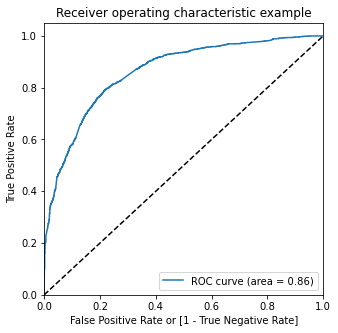

In [92]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

### Finding Optimal Cutoff Point

Optimal CutOff Probabilty is that probability where we get balanced specificity and sensitivity

In [93]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,CustID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.148794,7656,0,1,1,0,0,0,0,0,0,0,0
1,0,0.907860,8843,1,1,1,1,1,1,1,1,1,1,1
2,0,0.216934,8720,0,1,1,1,0,0,0,0,0,0,0
3,1,0.670543,4979,1,1,1,1,1,1,1,1,0,0,0
4,0,0.727846,1400,1,1,1,1,1,1,1,1,1,0,0


In [94]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.477920  1.000000  0.000000
0.1   0.1  0.556153  0.990619  0.158437
0.2   0.2  0.704102  0.938086  0.489910
0.3   0.3  0.755212  0.905253  0.617862
0.4   0.4  0.783457  0.800188  0.768141
0.5   0.5  0.782112  0.733114  0.826964
0.6   0.6  0.770455  0.666510  0.865608
0.7   0.7  0.739072  0.545966  0.915844
0.8   0.8  0.713517  0.449812  0.954916
0.9   0.9  0.650527  0.287523  0.982825


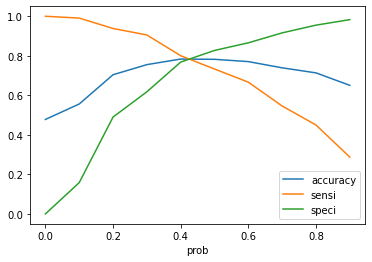

In [95]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

##### From the Curve 0.42 is the optimimum point to take it as a cutoff probability

In [96]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.42 else 0)

y_train_pred_final.head()

,Converted,Converted_Prob,CustID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.148794,7656,0,1,1,0,0,0,0,0,0,0,0,0
1,0,0.907860,8843,1,1,1,1,1,1,1,1,1,1,1,1
2,0,0.216934,8720,0,1,1,1,0,0,0,0,0,0,0,0
3,1,0.670543,4979,1,1,1,1,1,1,1,1,0,0,0,1
4,0,0.727846,1400,1,1,1,1,1,1,1,1,1,0,0,1


In [97]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7865949338713293

In [98]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[1827,  502],
       [ 450, 1682]], dtype=int64)

In [99]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [100]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7889305816135085

In [101]:
# Let us calculate specificity
TN / float(TN+FP)

0.7844568484328038

In [102]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.21554315156719622


In [103]:
# Positive predictive value 
print (TP / float(TP+FP))

0.7701465201465202


In [104]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8023715415019763


## Precision and Recall

In [105]:
#Looking at the confusion matrix again

In [106]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[1926,  403],
       [ 569, 1563]], dtype=int64)

In [107]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.7950152594099695

In [108]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.7331144465290806

In [109]:
#Importing Required Libraries
from sklearn.metrics import precision_score, recall_score

In [110]:
precision_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.7950152594099695

In [111]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.7331144465290806

### Precision and recall tradeoff

In [112]:
#Importing required libraries
from sklearn.metrics import precision_recall_curve

In [113]:
y_train_pred_final.Converted, y_train_pred_final.predicted

(0       0
 1       0
 2       0
 3       1
 4       0
        ..
 4456    1
 4457    0
 4458    0
 4459    1
 4460    1
 Name: Converted, Length: 4461, dtype: int64,
 0       0
 1       1
 2       0
 3       1
 4       1
        ..
 4456    1
 4457    0
 4458    0
 4459    1
 4460    1
 Name: predicted, Length: 4461, dtype: int64)

In [114]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

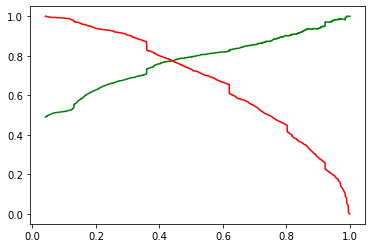

In [115]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

From the above graph we can see that the cutoff value is 0.42.Hence we will proceed with 0.42 cutoff value for test data set.

### Making predictions on the test set

In [116]:
scale = ['TotalVisits','Total Time Spent on Website','Page Views Per Visit']
X_test[scale] = scaler.transform(X_test[scale]) #scaling the testdata


In [117]:
X_train_sm3.columns

Index(['const', 'TotalVisits', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Lead Source_Welingak Website', 'Do Not Email_Yes',
       'Last Activity_Converted to Lead',
       'Last Activity_Olark Chat Conversation', 'Last Activity_SMS Sent',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Unreachable'],
      dtype='object')

In [118]:
colm = [ 'TotalVisits', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Lead Source_Welingak Website', 'Do Not Email_Yes',
       'Last Activity_Converted to Lead',
       'Last Activity_Olark Chat Conversation', 'Last Activity_SMS Sent',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Unreachable']

In [119]:
X_test = X_test[colm]

In [120]:
X_test_sm = sm.add_constant(X_test)

In [121]:
y_test_pred = res3.predict(X_test_sm)#Getting the predicted values on test_set

In [122]:
y_test_pred[:10]

2828    0.619918
6562    0.288903
7468    0.807833
6337    0.240224
8566    0.330782
338     0.130241
3940    0.493768
448     0.985069
7146    0.063675
4428    0.992262
dtype: float64

In [123]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [124]:
#Checking the data
y_pred_1.head()

,0
2828,0.619918
6562,0.288903
7468,0.807833
6337,0.240224
8566,0.330782


In [125]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [126]:
# Putting CustID to index
y_test_df['CustID'] = y_test_df.index

In [127]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [128]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [129]:
y_pred_final.head()

,Converted,CustID,0
0,1,2828,0.619918
1,0,6562,0.288903
2,0,7468,0.807833
3,0,6337,0.240224
4,1,8566,0.330782


In [130]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

In [131]:
y_pred_final.head()

,Converted,CustID,Converted_Prob
0,1,2828,0.619918
1,0,6562,0.288903
2,0,7468,0.807833
3,0,6337,0.240224
4,1,8566,0.330782


In [132]:
y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.42 else 0)

In [133]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.7986401673640168

In [134]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[788, 191],
       [194, 739]], dtype=int64)

In [135]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [136]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7920685959271169

In [137]:
# Let us calculate specificity
TN / float(TN+FP)

0.804902962206333